### Extracting descriptors from SILDa patches

This assumes that the data are already downloaded. If not, please run 
```bash
sh download.sh
```

The `readme.md` file provides more information.

In [1]:
import numpy as np
import h5py
from tqdm import tqdm
import os
import cv2
import matplotlib.pyplot as plt
import sys
%matplotlib inline

In [2]:
# Helper method to visualise a set of patches from the same point index
def vis_patches(patches, idx):
    p = patches[idx]
    p = np.concatenate(p, axis=1)
    return cv2.cvtColor(p, cv2.COLOR_BGR2RGB)

In [3]:
# Load the patches, and get a list of the point indices
patches = h5py.File('./data/silda-dataset/patches.h5', 'r')
points_idxs = [x for x in list(patches.keys()) if "spherical" not in x]

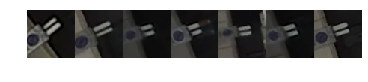

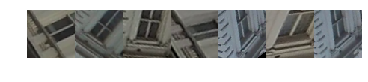

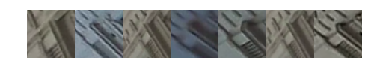

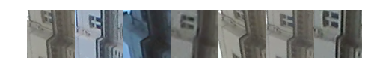

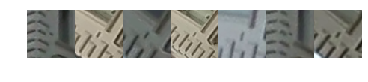

In [7]:
# Show patches from the first 5 points 
for k in range(5):
    p = vis_patches(patches,points_idxs[k])
    plt.imshow(p)
    plt.axis('off')
    plt.show()

# Extract descriptors from all the patches

In the example below, we just use the resized and flattened patch as a descriptor (FlattenDesc).
You can replace the descriptor extraction process with your own method, and save the results 
in a `.h5` file as shown below.

The results must be saved on a `.h5` file, where one key represents one dataset. 
E.g assuming $N$ point indices, the `patches.h5` file contains $N*7$ patches, the final 
descriptors file should have $N*7$ descriptors, where each dataset is defined using the 
`point_idx` as below.

In [6]:

# Fill in submission information - IMPORTANT
DESCR_NAME = "FlattenDesc"
AUTHOR_NAME = "Jack Descriptor"
AUTHOR_EMAIL = "jack@descriptors.com"


descriptors = h5py.File(DESCR_NAME+'-silda-patches-descriptors.h5', 'w')
# Loop through all the interest points, read thei patches, compute and save the descriptors
for point_idx in tqdm(points_idxs):
    p = patches[point_idx]
    desc = np.array([cv2.resize(cv2.cvtColor(x, cv2.COLOR_BGR2GRAY),(16,16)).flatten() for x in p])
    # desc.shape = (7, 256) since FlattenDesc is 16^2=256-dimensional descriptor
    # For a desriptor with DIMS dimensions, the output will be 7xDIMS since 
    # each point_idx has 7 patches
    descriptors.create_dataset(point_idx, data=desc)

descriptors['descriptor_name'] = np.string_(DESCR_NAME) 
descriptors['contact_name'] = np.string_(AUTHOR_NAME) 
descriptors['contact_email'] = np.string_(AUTHOR_EMAIL) 
descriptors.close()  

100%|██████████| 278583/278583 [12:50<00:00, 361.63it/s]


# Submission guidelines
`FlattenDesc-silda-patches-descriptors.h5` now contains the descriptors for the simple `FlattenDesc` descriptor example. 
Replace the patch description process with your method, and do not forget to fill in the required information as shown below:

```python
# Fill in submission information - IMPORTANT
DESCR_NAME = "FlattenDesc"
AUTHOR_NAME = "Jack Descriptor"
AUTHOR_EMAIL = "jack@descriptors.com"
```

Finally, please upload the resulting `.h5` file [using this link](https://www.dropbox.com/request/kQIIcRCWUwBTxRSpJVHo?oref=e)

If for any reason the above link does not work, or you cannot access it please send an email to [vassileios@scape.io](mailto:vassileios@scape.io)